In [2]:
# 导入必要的库
from sklearn.feature_extraction import DictVectorizer
import pandas as pd

# 创建示例数据
data = [
    {'city': '北京', 'temperature': 25, 'humidity': 60},
    {'city': '上海', 'temperature': 30, 'humidity': 70},
    {'city': '广州', 'temperature': 28, 'humidity': 80},
    {'city': '深圳', 'temperature': 32, 'humidity': 75},
    {'city': '北京', 'temperature': 20, 'humidity': 50}
]

# 创建DictVectorizer对象
vectorizer = DictVectorizer(sparse=False)

# 将字典列表转换为特征矩阵
X = vectorizer.fit_transform(data)

# 获取特征名称
feature_names = vectorizer.get_feature_names_out()

# 创建DataFrame以便更好地查看结果
df = pd.DataFrame(X, columns=feature_names)

print("原始数据:")
for item in data:
    print(item)

print("\n转换后的特征矩阵:")
print(df)

print("\n特征名称:")
print(feature_names)

# 查看转换的详细信息
print("\n转换详情:")
print(f"特征矩阵形状: {X.shape}")
print(f"特征类型: {type(X)}")

# 演示如何处理新数据
new_data = [{'city': '杭州', 'temperature': 26, 'humidity': 65}]
X_new = vectorizer.transform(new_data)
print("\n新数据转换结果:")
print(pd.DataFrame(X_new, columns=feature_names))


原始数据:
{'city': '北京', 'temperature': 25, 'humidity': 60}
{'city': '上海', 'temperature': 30, 'humidity': 70}
{'city': '广州', 'temperature': 28, 'humidity': 80}
{'city': '深圳', 'temperature': 32, 'humidity': 75}
{'city': '北京', 'temperature': 20, 'humidity': 50}

转换后的特征矩阵:
   city=上海  city=北京  city=广州  city=深圳  humidity  temperature
0      0.0      1.0      0.0      0.0      60.0         25.0
1      1.0      0.0      0.0      0.0      70.0         30.0
2      0.0      0.0      1.0      0.0      80.0         28.0
3      0.0      0.0      0.0      1.0      75.0         32.0
4      0.0      1.0      0.0      0.0      50.0         20.0

特征名称:
['city=上海' 'city=北京' 'city=广州' 'city=深圳' 'humidity' 'temperature']

转换详情:
特征矩阵形状: (5, 6)
特征类型: <class 'numpy.ndarray'>

新数据转换结果:
   city=上海  city=北京  city=广州  city=深圳  humidity  temperature
0      0.0      0.0      0.0      0.0      65.0         26.0


In [3]:
# 导入CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# 创建示例英文文本数据
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?'
]

# 创建CountVectorizer对象
vectorizer = CountVectorizer()

# 将文本转换为词频矩阵
X = vectorizer.fit_transform(corpus)

# 获取特征名称(词汇表)
feature_names = vectorizer.get_feature_names_out()

# 创建DataFrame展示结果
df = pd.DataFrame(X.toarray(), columns=feature_names)

print("原始文本数据:")
for text in corpus:
    print(text)

print("\n转换后的词频矩阵:")
print(df)

print("\n词汇表(特征名称):")
print(feature_names)

# 演示处理新文本
new_text = ["This is a new document to test."]
X_new = vectorizer.transform(new_text)
print("\n新文本转换结果:")
print(pd.DataFrame(X_new.toarray(), columns=feature_names))





原始文本数据:
This is the first document.
This document is the second document.
And this is the third one.
Is this the first document?

转换后的词频矩阵:
   and  document  first  is  one  second  the  third  this
0    0         1      1   1    0       0    1      0     1
1    0         2      0   1    0       1    1      0     1
2    1         0      0   1    1       0    1      1     1
3    0         1      1   1    0       0    1      0     1

词汇表(特征名称):
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']

新文本转换结果:
   and  document  first  is  one  second  the  third  this
0    0         1      0   1    0       0    0      0     1


In [4]:
# 导入必要的库
from sklearn.feature_extraction.text import CountVectorizer
import jieba

# 创建示例中文文本数据
corpus = [
    '这是第一个文档',
    '这个文档是第二个文档',
    '而这个是第三个文档',
    '这是第一个文档吗'
]

# 使用jieba进行中文分词
def chinese_tokenizer(text):
    return jieba.lcut(text)

# 创建CountVectorizer对象，使用自定义分词器
vectorizer = CountVectorizer(tokenizer=chinese_tokenizer)

# 将文本转换为词频矩阵
X = vectorizer.fit_transform(corpus)

# 获取特征名称(词汇表)
feature_names = vectorizer.get_feature_names_out()

# 创建DataFrame展示结果
df = pd.DataFrame(X.toarray(), columns=feature_names)

print("原始文本数据:")
for text in corpus:
    print(text)

print("\n转换后的词频矩阵:")
print(df)

print("\n词汇表(特征名称):")
print(feature_names)

# 演示处理新文本
new_text = ["这是一个新的测试文档"]
X_new = vectorizer.transform(new_text)
print("\n新文本转换结果:")
print(pd.DataFrame(X_new.toarray(), columns=feature_names))


d:\Soft\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ARKHAM~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.319 seconds.
Prefix dict has been built successfully.


原始文本数据:
这是第一个文档
这个文档是第二个文档
而这个是第三个文档
这是第一个文档吗

转换后的词频矩阵:
   吗  文档  是  第一个  第三个  第二个  而  这个  这是
0  0   1  0    1    0    0  0   0   1
1  0   2  1    0    0    1  0   1   0
2  0   1  1    0    1    0  1   1   0
3  1   1  0    1    0    0  0   0   1

词汇表(特征名称):
['吗' '文档' '是' '第一个' '第三个' '第二个' '而' '这个' '这是']

新文本转换结果:
   吗  文档  是  第一个  第三个  第二个  而  这个  这是
0  0   1  0    0    0    0  0   0   1


In [8]:
# 导入TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# 使用相同的语料库
corpus = [
    '机器学习是人工智能的一个分支',
    '深度学习是机器学习的一种方法', 
    '自然语言处理是人工智能的重要应用',
]

# 创建TfidfVectorizer对象，使用jieba分词
tfidf_vectorizer = TfidfVectorizer(tokenizer=chinese_tokenizer)

# 计算TF-IDF特征矩阵
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# 获取特征名称
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# 创建DataFrame展示结果
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature_names)

print("\nTF-IDF特征矩阵:")
print(tfidf_df)

print("\nTF-IDF特征名称:")
print(tfidf_feature_names)

# 演示处理新文本
new_text = ["这是一个新的测试文档"]
tfidf_new = tfidf_vectorizer.transform(new_text)
print("\n新文本的TF-IDF转换结果:")
print(pd.DataFrame(tfidf_new.toarray(), columns=tfidf_feature_names))



TF-IDF特征矩阵:
         一个        一种     人工智能        分支        处理        学习        应用  \
0  0.474961  0.000000  0.36122  0.474961  0.000000  0.361220  0.000000   
1  0.000000  0.389555  0.00000  0.000000  0.000000  0.592533  0.000000   
2  0.000000  0.000000  0.33110  0.000000  0.435357  0.000000  0.435357   

         方法         是        机器        深度         的      自然语言        重要  
0  0.000000  0.280520  0.361220  0.000000  0.280520  0.000000  0.000000  
1  0.389555  0.230077  0.296267  0.389555  0.230077  0.000000  0.000000  
2  0.000000  0.257129  0.000000  0.000000  0.257129  0.435357  0.435357  

TF-IDF特征名称:
['一个' '一种' '人工智能' '分支' '处理' '学习' '应用' '方法' '是' '机器' '深度' '的' '自然语言' '重要']

新文本的TF-IDF转换结果:
         一个   一种  人工智能   分支   处理   学习   应用   方法    是   机器   深度         的  \
0  0.861037  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.508542   

   自然语言   重要  
0   0.0  0.0  


d:\Soft\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [9]:
# 导入必要的库
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

# 创建示例数据
data = np.array([[1, 10, 100],
                 [2, 20, 200], 
                 [3, 30, 300],
                 [4, 40, 400]])

print("原始数据:")
print(data)

# MinMaxScaler归一化 (将数据缩放到[0,1]区间)
min_max_scaler = MinMaxScaler()
data_minmax = min_max_scaler.fit_transform(data)

print("\nMinMaxScaler归一化后的数据:")
print(data_minmax)

# StandardScaler标准化 (均值为0,方差为1)
standard_scaler = StandardScaler()
data_standard = standard_scaler.fit_transform(data)

print("\nStandardScaler标准化后的数据:")
print(data_standard)

# 使用DataFrame更直观地展示结果
df_comparison = pd.DataFrame({
    '原始数据_特征1': data[:, 0],
    '归一化后_特征1': data_minmax[:, 0],
    '标准化后_特征1': data_standard[:, 0]
})

print("\n对比结果(第一个特征):")
print(df_comparison)


原始数据:
[[  1  10 100]
 [  2  20 200]
 [  3  30 300]
 [  4  40 400]]

MinMaxScaler归一化后的数据:
[[0.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333]
 [0.66666667 0.66666667 0.66666667]
 [1.         1.         1.        ]]

StandardScaler标准化后的数据:
[[-1.34164079 -1.34164079 -1.34164079]
 [-0.4472136  -0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079  1.34164079]]

对比结果(第一个特征):
   原始数据_特征1  归一化后_特征1  标准化后_特征1
0         1  0.000000 -1.341641
1         2  0.333333 -0.447214
2         3  0.666667  0.447214
3         4  1.000000  1.341641


In [10]:
# 导入必要的库
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

# 创建包含缺失值的示例数据
data = np.array([
    [1, 2, np.nan, 4],
    [5, np.nan, 7, 8],
    [np.nan, 10, 11, 12],
    [13, 14, 15, np.nan]
])

print("原始数据(包含缺失值):")
print(data)

# 创建SimpleImputer对象,使用均值策略填充缺失值
imputer_mean = SimpleImputer(strategy='mean')
data_mean = imputer_mean.fit_transform(data)

print("\n使用均值填充后的数据:")
print(data_mean)

# 创建SimpleImputer对象,使用中位数策略填充缺失值
imputer_median = SimpleImputer(strategy='median')
data_median = imputer_median.fit_transform(data)

print("\n使用中位数填充后的数据:")
print(data_median)

# 创建SimpleImputer对象,使用常数0填充缺失值
imputer_constant = SimpleImputer(strategy='constant', fill_value=0)
data_constant = imputer_constant.fit_transform(data)

print("\n使用常数0填充后的数据:")
print(data_constant)

# 使用DataFrame更直观地展示结果
df_comparison = pd.DataFrame({
    '原始数据': data[:, 0],
    '均值填充': data_mean[:, 0],
    '中位数填充': data_median[:, 0],
    '常数填充': data_constant[:, 0]
})

print("\n对比结果(第一列):")
print(df_comparison)


原始数据(包含缺失值):
[[ 1.  2. nan  4.]
 [ 5. nan  7.  8.]
 [nan 10. 11. 12.]
 [13. 14. 15. nan]]

使用均值填充后的数据:
[[ 1.          2.         11.          4.        ]
 [ 5.          8.66666667  7.          8.        ]
 [ 6.33333333 10.         11.         12.        ]
 [13.         14.         15.          8.        ]]

使用中位数填充后的数据:
[[ 1.  2. 11.  4.]
 [ 5. 10.  7.  8.]
 [ 5. 10. 11. 12.]
 [13. 14. 15.  8.]]

使用常数0填充后的数据:
[[ 1.  2.  0.  4.]
 [ 5.  0.  7.  8.]
 [ 0. 10. 11. 12.]
 [13. 14. 15.  0.]]

对比结果(第一列):
   原始数据       均值填充  中位数填充  常数填充
0   1.0   1.000000    1.0   1.0
1   5.0   5.000000    5.0   5.0
2   NaN   6.333333    5.0   0.0
3  13.0  13.000000   13.0  13.0


In [11]:
# 导入VarianceThreshold
from sklearn.feature_selection import VarianceThreshold

# 创建示例数据
X = np.array([[0, 2, 0, 3],
              [0, 1, 4, 3], 
              [0, 1, 1, 3],
              [0, 1, 2, 3]])

print("原始数据:")
print(X)
print("\n各特征的方差:")
print(np.var(X, axis=0))

# 创建VarianceThreshold对象,设置阈值为0.5
selector = VarianceThreshold(threshold=0.5)

# 进行特征选择
X_selected = selector.fit_transform(X)

print("\n保留的特征的布尔掩码(True表示保留):")
print(selector.get_support())

print("\n经过方差阈值选择后的数据:")
print(X_selected)

# 使用DataFrame更直观地展示结果
df = pd.DataFrame(X, columns=['特征1', '特征2', '特征3', '特征4'])
print("\n原始数据DataFrame形式:")
print(df)

selected_features = df.columns[selector.get_support()].tolist()
df_selected = pd.DataFrame(X_selected, columns=selected_features)
print("\n选择后的数据DataFrame形式:")
print(df_selected)


原始数据:
[[0 2 0 3]
 [0 1 4 3]
 [0 1 1 3]
 [0 1 2 3]]

各特征的方差:
[0.     0.1875 2.1875 0.    ]

保留的特征的布尔掩码(True表示保留):
[False False  True False]

经过方差阈值选择后的数据:
[[0]
 [4]
 [1]
 [2]]

原始数据DataFrame形式:
   特征1  特征2  特征3  特征4
0    0    2    0    3
1    0    1    4    3
2    0    1    1    3
3    0    1    2    3

选择后的数据DataFrame形式:
   特征3
0    0
1    4
2    1
3    2


原始数据:
[[ 1  1  3]
 [ 2  2  2]
 [ 3  3  1]
 [ 4  4  0]
 [ 5  5 -1]]

降维后的数据:
[[-3.46410162e+00 -3.39648366e-16]
 [-1.73205081e+00  1.13216122e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.73205081e+00 -1.13216122e-16]
 [ 3.46410162e+00 -2.26432244e-16]]

各主成分解释的方差比例:
[1.00000000e+00 6.40894514e-33]

累积解释的方差比例:
[1. 1.]


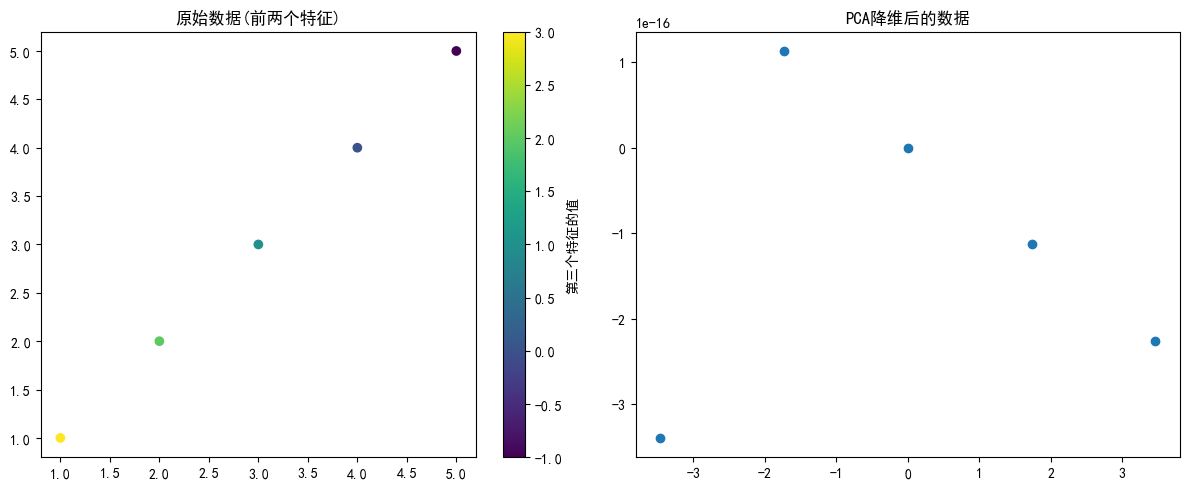


主成分的方向(特征向量):
[[ 0.57735027  0.57735027 -0.57735027]
 [ 0.81649658 -0.40824829  0.40824829]]


In [13]:
# 导入PCA
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 创建一些示例数据
X = np.array([[1, 1, 3],
              [2, 2, 2],
              [3, 3, 1],
              [4, 4, 0],
              [5, 5, -1]])

print("原始数据:")
print(X)

# 创建PCA对象,设置保留2个主成分
pca = PCA(n_components=2)

# 对数据进行降维
X_pca = pca.fit_transform(X)

print("\n降维后的数据:")
print(X_pca)

print("\n各主成分解释的方差比例:")
print(pca.explained_variance_ratio_)

print("\n累积解释的方差比例:")
print(np.cumsum(pca.explained_variance_ratio_))

# 可视化原始数据和降维后的数据
plt.figure(figsize=(12, 5))

# 绘制原始数据的散点图
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=X[:, 2])
plt.title("原始数据(前两个特征)")
plt.colorbar(label='第三个特征的值')

# 绘制降维后的数据散点图
plt.subplot(122)
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title("PCA降维后的数据")

plt.tight_layout()
plt.show()

# 查看主成分的方向(特征向量)
print("\n主成分的方向(特征向量):")
print(pca.components_)


In [15]:
# 加载鸢尾花数据集
from sklearn.datasets import load_iris

# 载入数据
iris = load_iris()

# 展示数据集的基本信息
print("数据集基本信息:")
print(f"样本数量: {iris.data.shape[0]}")
print(f"特征数量: {iris.data.shape[1]}")
print(f"目标类别数: {len(np.unique(iris.target))}")

print("\n特征名称:")
print(iris.feature_names)

print("\n目标类别名称:")
print(iris.target_names)

print("\n数据集描述:")
print(iris.DESCR)

# 展示前5条数据样本
print("\n前5条数据样本:")
print("特征值:")
print(iris.data[:5])
print("\n对应标签:")
print(iris.target[:5])


数据集基本信息:
样本数量: 150
特征数量: 4
目标类别数: 3

特征名称:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

目标类别名称:
['setosa' 'versicolor' 'virginica']

数据集描述:
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5 

In [18]:
# 加载20类新闻数据集
from sklearn.datasets import fetch_20newsgroups

# 载入数据
newsgroups = fetch_20newsgroups(subset='all')

# 展示数据集的基本信息
print("数据集基本信息:")
print(f"样本数量: {len(newsgroups.data)}")
print(f"目标类别数: {len(np.unique(newsgroups.target))}")

print("\n目标类别名称:")
print(newsgroups.target_names)

print("\n数据集描述:")
print(newsgroups.DESCR)

# 展示前2条数据样本
print("\n前2条数据样本:")
print("文本内容:")
print(newsgroups.data[0])
print("\n对应标签:")
print(f"标签编号:{newsgroups.target[0]}")
print(f"标签名称:{newsgroups.target_names[newsgroups.target[0]]}")


数据集基本信息:
样本数量: 18846
目标类别数: 20

目标类别名称:
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

数据集描述:
.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extr

In [19]:
# 加载加利福尼亚房价数据集
from sklearn.datasets import fetch_california_housing

# 载入数据
california = fetch_california_housing()

# 展示数据集的基本信息
print("数据集基本信息:")
print(f"样本数量: {california.data.shape[0]}")
print(f"特征数量: {california.data.shape[1]}")

print("\n特征名称:")
print(california.feature_names)

print("\n数据集描述:")
print(california.DESCR)

# 展示前5条数据样本
print("\n前5条数据样本:")
print("特征值:")
print(california.data[:5])
print("\n对应房价:")
print(california.target[:5])


数据集基本信息:
样本数量: 20640
特征数量: 8

特征名称:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

数据集描述:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California